In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets, neighbors
#from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
#from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.spatial import distance

In [ ]:
from pandas.core.frame import DataFrame
df=pd.read_csv("/content/trainKNN.txt",header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       196 non-null    int64  
 1   1       196 non-null    float64
 2   2       196 non-null    float64
 3   3       196 non-null    float64
 4   4       196 non-null    float64
 5   5       196 non-null    float64
 6   6       196 non-null    float64
 7   7       196 non-null    float64
 8   8       196 non-null    float64
 9   9       196 non-null    float64
 10  10      196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [ ]:
from pandas.core.frame import DataFrame
test=pd.read_csv("/content/testKNN.txt",header=None)
test.columns=["Id number","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"]


In [ ]:
df2=test.drop(columns="Id number").head()
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [ ]:
df.columns=["Id number","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"]
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df1=df.drop(columns="Id number")
df1.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


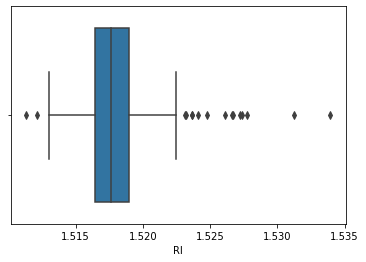

In [ ]:
sns.boxplot(df1["RI"])

In [ ]:

percentile25 = df1['RI'].quantile(0.25)
percentile75 = df1['RI'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  1.5164575
75th percentile of the data is  1.518985
IQR : 0.002527500000000016


In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

1.5227762500000002
1.51266625


In [ ]:
df1['RI'] = np.where(
    df1['RI']>max_value,
    max_value,
    np.where(
        df1['RI']<min_value,
        min_value,
        df1['RI']
    ) 
)
df1['RI'].describe()

count    196.000000
mean       1.518046
std        0.002286
min        1.512666
25%        1.516458
50%        1.517630
75%        1.518985
max        1.522776
Name: RI, dtype: float64

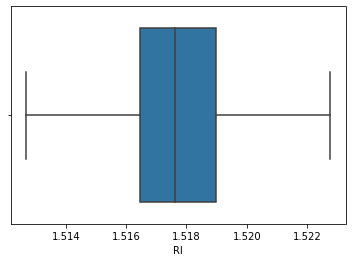

In [ ]:
sns.boxplot(df1["RI"])

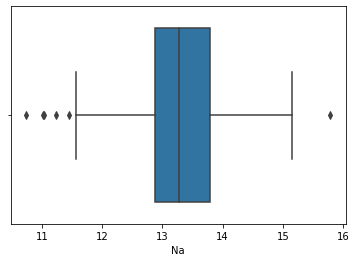

In [ ]:
sns.boxplot(df1["Na"])

In [ ]:

percentile25 = df1['Na'].quantile(0.25)
percentile75 = df1['Na'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  12.877500000000001
75th percentile of the data is  13.7925
IQR : 0.9149999999999991


In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

15.165
11.505000000000003


In [ ]:
df1['Na'] = np.where(
    df1['Na']>max_value,
    max_value,
    np.where(
        df1['Na']<min_value,
        min_value,
        df1['Na']
    ) 
)
df1['Na'].describe()

count    196.000000
mean      13.382551
std        0.744532
min       11.505000
25%       12.877500
50%       13.280000
75%       13.792500
max       15.165000
Name: Na, dtype: float64

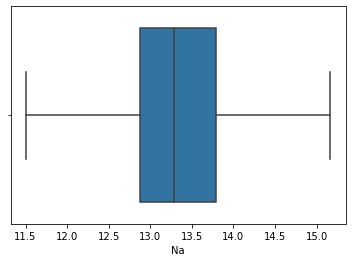

In [ ]:


sns.boxplot(df1["Na"])

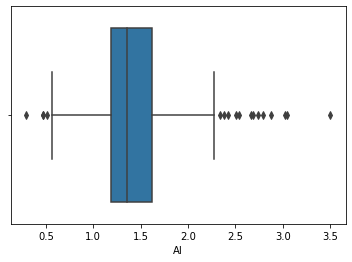

In [ ]:
sns.boxplot(df1['Al'])

In [ ]:
percentile25 = df1['Al'].quantile(0.25)
percentile75 = df1['Al'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  1.19
75th percentile of the data is  1.6225
IQR : 0.4325000000000001


In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

2.27125
0.5412499999999998


In [ ]:

df1['Al'] = np.where(
    df1['Al']>max_value,
    max_value,
    np.where(
        df1['Al']<min_value,
        min_value,
        df1['Al']
    ) 
)
df1['Al'].describe()

count    196.000000
mean       1.426027
std        0.407419
min        0.541250
25%        1.190000
50%        1.360000
75%        1.622500
max        2.271250
Name: Al, dtype: float64

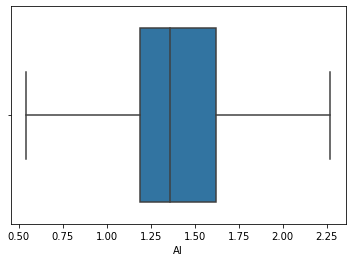

In [ ]:
sns.boxplot(df1["Al"])

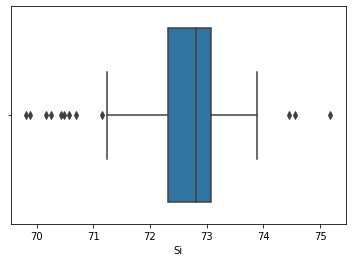

In [ ]:
sns.boxplot(df["Si"])

In [ ]:
percentile25 = df1['Si'].quantile(0.25)
percentile75 = df1['Si'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  72.3175
75th percentile of the data is  73.08
IQR : 0.7625000000000028


In [ ]:

max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

74.22375
71.17374999999998


In [ ]:
df1['Si'] = np.where(
    df1['Si']>max_value,
    max_value,
    np.where(
        df1['Si']<min_value,
        min_value,
        df1['Si']
    ) 
)
df1['Si'].describe()

count    196.000000
mean      72.664005
std        0.640031
min       71.173750
25%       72.317500
50%       72.810000
75%       73.080000
max       74.223750
Name: Si, dtype: float64

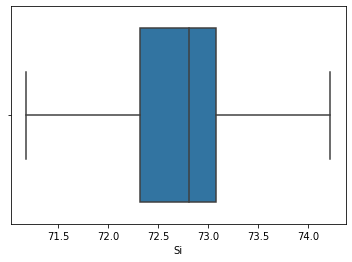

In [ ]:
sns.boxplot(df1["Si"])

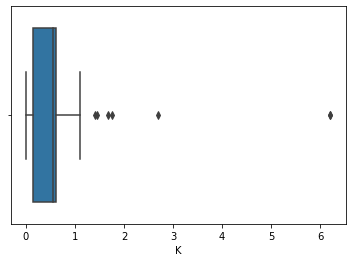

In [ ]:
sns.boxplot(df1["K"])

In [ ]:

percentile25 = df1['K'].quantile(0.25)
percentile75 = df1['K'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.14
75th percentile of the data is  0.61
IQR : 0.47


In [ ]:


max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

1.315
-0.565


In [ ]:
df1['K'] = np.where(
    df1['K']>max_value,
    max_value,
    np.where(
        df1['K']<min_value,
        min_value,
        df1['K']
    ) 
)
df1['K'].describe()

count    196.000000
mean       0.457015
std        0.302354
min        0.000000
25%        0.140000
50%        0.560000
75%        0.610000
max        1.315000
Name: K, dtype: float64

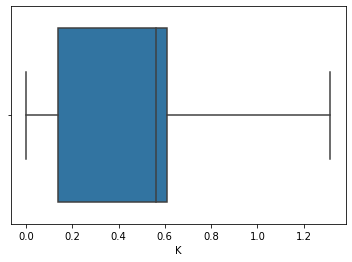

In [ ]:
sns.boxplot(df1['K'])

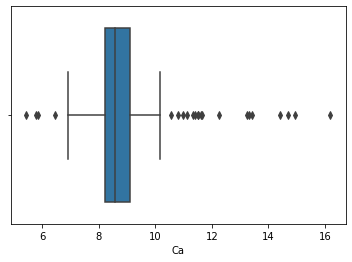

In [ ]:
sns.boxplot(df1["Ca"])

In [ ]:
percentile25 = df1['Ca'].quantile(0.25)
percentile75 = df1['Ca'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  8.22
75th percentile of the data is  9.092500000000001
IQR : 0.8725000000000005


In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

10.401250000000001
6.91125


In [ ]:
df1['Ca'] = np.where(
    df1['Ca']>max_value,
    max_value,
    np.where(
        df1['Ca']<min_value,
        min_value,
        df1['Ca']
    ) 
)
df1['Ca'].describe()

count    196.000000
mean       8.738967
std        0.811794
min        6.911250
25%        8.220000
50%        8.575000
75%        9.092500
max       10.401250
Name: Ca, dtype: float64

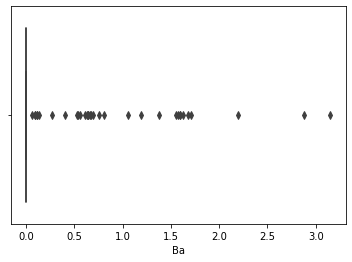

In [ ]:
sns.boxplot(df1["Ba"])

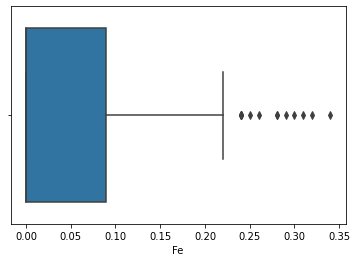

In [ ]:
sns.boxplot(df1["Fe"])

In [ ]:
percentile25 = df1['Fe'].quantile(0.25)
percentile75 = df1['Fe'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.0
75th percentile of the data is  0.09
IQR : 0.09


In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

0.225
-0.135


In [ ]:
df1['Fe'] = np.where(
    df1['Fe']>max_value,
    max_value,
    np.where(
        df1['Fe']<min_value,
        min_value,
        df1['Fe']
    ) 
)
df1['Fe'].describe()

count    196.000000
mean       0.046786
std        0.077325
min        0.000000
25%        0.000000
50%        0.000000
75%        0.090000
max        0.225000
Name: Fe, dtype: float64

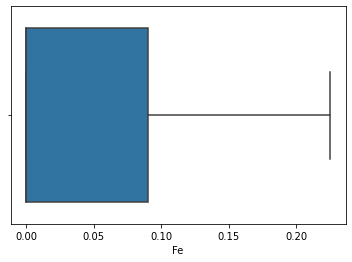

In [ ]:
sns.boxplot(df1["Fe"])

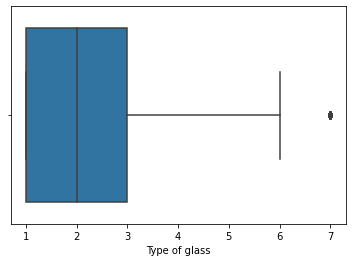

In [ ]:
sns.boxplot(df1['Type of glass'])


In [ ]:
df1['Type of glass'].value_counts()

2    73
1    67
7    26
3    14
5    10
6     6
Name: Type of glass, dtype: int64

In [ ]:
X_train = df1.drop(["Type of glass"], axis=1)
y_train = df1["Type of glass"]
X_test = df2.drop("Type of glass", axis=1) 
y_test = df2["Type of glass"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  euclid_model = KNeighborsClassifier(i, metric=distance.sqeuclidean) #initialising the model
  euclid_model.fit(X_train, y_train) # training the model
  print("K value  : " , i, " train score : ", euclid_model.score(X_train,y_train) , " score : ", np.mean(cross_val_score(euclid_model, X_train, y_train, cv=5))) #predicting using the model

K value  :  1  train score :  1.0  score :  0.6379487179487179
K value  :  2  train score :  0.8418367346938775  score :  0.6584615384615384
K value  :  3  train score :  0.8622448979591837  score :  0.6737179487179487
K value  :  4  train score :  0.8010204081632653  score :  0.6838461538461538
K value  :  5  train score :  0.8010204081632653  score :  0.6688461538461539
K value  :  6  train score :  0.7755102040816326  score :  0.6737179487179488
K value  :  7  train score :  0.7551020408163265  score :  0.6533333333333333
K value  :  8  train score :  0.7602040816326531  score :  0.6430769230769231
K value  :  9  train score :  0.7448979591836735  score :  0.6378205128205128
K value  :  10  train score :  0.7244897959183674  score :  0.6276923076923077
K value  :  20  train score :  0.6785714285714286  score :  0.5971794871794872
K value  :  50  train score :  0.6020408163265306  score :  0.49974358974358973


In [ ]:
euclid_model = KNeighborsClassifier(4)
euclid_model.fit(X_train,y_train)
euclid_model.score(X_test,y_test)

0.8

In [ ]:
X_train = df1.drop(["Type of glass"], axis=1)
y_train = df1["Type of glass"]
X_test = df2.drop("Type of glass", axis=1) 
y_test = df2["Type of glass"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  manhattan_model = KNeighborsClassifier(i,metric=distance.cityblock)
  manhattan_model.fit(X_train, y_train)
  print("K value  : " , i, " train score : ", manhattan_model.score(X_train,y_train) , " score : ", np.mean(cross_val_score(manhattan_model, X_train, y_train, cv=5))) #predicting using the model

K value  :  1  train score :  1.0  score :  0.6532051282051282
K value  :  2  train score :  0.8571428571428571  score :  0.6735897435897436
K value  :  3  train score :  0.8622448979591837  score :  0.678974358974359
K value  :  4  train score :  0.826530612244898  score :  0.6938461538461538
K value  :  5  train score :  0.8163265306122449  score :  0.6788461538461539
K value  :  6  train score :  0.8163265306122449  score :  0.6837179487179487
K value  :  7  train score :  0.7755102040816326  score :  0.6480769230769231
K value  :  8  train score :  0.7857142857142857  score :  0.6480769230769231
K value  :  9  train score :  0.7704081632653061  score :  0.6430769230769231
K value  :  10  train score :  0.7704081632653061  score :  0.6584615384615385
K value  :  20  train score :  0.7091836734693877  score :  0.6226923076923077
K value  :  50  train score :  0.6377551020408163  score :  0.5353846153846153


In [ ]:
manhattan_model = KNeighborsClassifier(4)
manhattan_model.fit(X_train,y_train)
manhattan_model.score(X_test,y_test)

0.8

Best value of k is 4 for euclidean metric and manhattan distance matrices

score=0.8
